# Rolling Occurence By Date

If you want to estimate the look back frequency of data that you only have timestamp data for. 

In [1]:
import time
import pyprind
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from datetime import datetime as dt
from datetime import timedelta
from IPython.display import display, Markdown

%matplotlib inline

sns.set(font_scale=1.15, rc={'figure.figsize': (15, 5), 'lines.linewidth': 1})
sns.set_style('whitegrid')

ymd_format = '%Y-%m-%d'

In [2]:
# Preprocess Data
data = pd.read_csv('data/did it 17042016.csv', header=-1)
data.columns = ['time', 'lat', 'long']
data['year'] = np.nan
data['day'] = np.nan
data['elapsed'] = np.nan
data['date'] = ''

progress = pyprind.ProgBar(len(data), bar_char='█', title='Creating Timestamps')
for i, time_string in enumerate(data['time']):
    time_data = dt.strptime(time_string, '%B %d, %Y at %I:%M%p').timetuple()
    data.loc[i, 'year'] = time_data.tm_year
    data.loc[i, 'day'] = time_data.tm_yday
    data.loc[i, 'elapsed'] = (365 * (time_data.tm_year - 2015)) + (time_data.tm_yday - 121)
    data.loc[i, 'date'] = time.strftime(ymd_format, time_data)
    progress.update()
    
display(data.tail(2))

Creating Timestamps
0%                          100%
[██████████████████████████████] | ETA: 00:00:00
Total time elapsed: 00:00:00


,time,lat,long,year,day,elapsed,date
80,"April 17, 2016 at 01:52AM",43.768434,-79.503942,2016.0,108.0,352.0,2016-04-17
81,"April 17, 2016 at 01:53AM",43.768434,-79.503942,2016.0,108.0,352.0,2016-04-17


In [3]:
# Remap data to count list
n = int(data.tail(1)['elapsed'].values[0])

count_list = pd.DataFrame(data=np.arange(start=0, stop=n, step=1, dtype=int).T, columns=['count'])
count_list['date'] = ''

last_date = None
count_progress = pyprind.ProgBar(n, bar_char='█', title='Saving Counts')        
for i in range(n+1):
    row = data.loc[data['elapsed'] == i]
    
    if len(row) > 0:
        # Save Data
        i_date = dt.strptime(row.values[0][-1], ymd_format)
        count_list.loc[i, 'count'] = len(row)
        count_list.loc[i, 'date'] = i_date
        last_date = i_date
    else:
        # Iterate last date.
        date_string = last_date.strftime(ymd_format)
        i_date = dt.strptime(date_string, ymd_format)
        i_date = i_date + timedelta(days=1)
        last_date = i_date
        
        # Save Data
        count_list.loc[i, 'count'] = 0
        count_list.loc[i, 'date'] = last_date
        
    count_progress.update()

display(count_list.tail(2))

Saving Counts
0%                          100%
[██████████████████████████████] | ETA: 00:00:00
Total time elapsed: 00:00:01


,count,date
351,0.0,2016-04-16 00:00:00
352,2.0,2016-04-17 00:00:00


# Weekly and Monthly Averages

It's time to end this once and for all! The graph will be BEAUTIFUL!!!

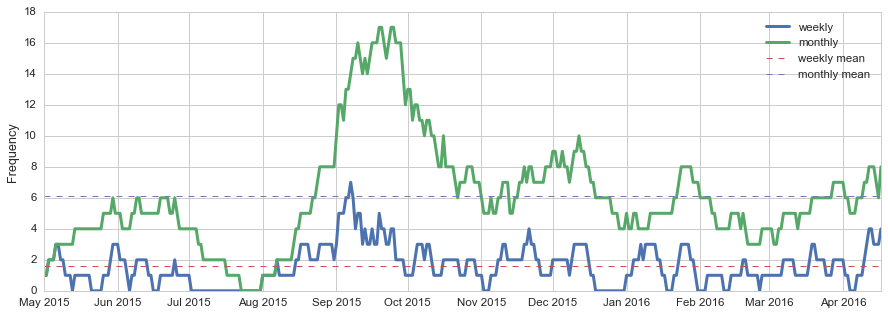

In [4]:
count_list['weekly'] = count_list['count'].rolling(window=7, min_periods=0).sum()
count_list['weekly mean'] = count_list['weekly'].mean()
count_list['monthly'] = count_list['count'].rolling(window=28, min_periods=0).sum()
count_list['monthly mean'] = count_list['monthly'].mean()

graph.plot(count_list['date'], count_list['weekly'], linewidth=3)
graph.plot(count_list['date'], count_list['monthly'], linewidth=3)
graph.plot(count_list['date'], count_list['weekly mean'], linestyle='--')
graph.plot(count_list['date'], count_list['monthly mean'], linestyle='--')
graph.ylabel('Frequency')
graph.legend(loc=0)
graph.show()

**WOW!!** Look at that!